# Data Documentation

- `user` : Unique ID for each user.
- `first_open` : Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.
- `dayofweek` : On which day user logon.
0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
- `hour` : Time of a day in 24-hour format customer logon. It is correlated with `dayofweek` column.
- `age` : The age of the registered user.
- `screen_list` : The name of multiple screens seen by customers.
-  `numscreens` : The total number of screens seen by customers.
- `minigame` : Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.
- `used_premium_feature`: If the customer used the premium feature of the app then 1 otherwise 0.
- `enrolled` : If the user bought a premium feature app then 1 otherwise 0.
- `enrolled_date` : On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.
- `liked` : The each screen of the app has a like button if the customer likes it then 1 otherwise 0.
- users / customers can use premium features / premium app only for 24 hours trial. after that the company want to target them with new offers shortly after the trial is over

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data_prp = pd.read_csv('appdata10.csv')
data_prp

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [3]:
data_prp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [4]:
data_prp.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_prp.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

## Create Data Description

In [6]:
list_summary = []

for col in data_prp.columns:
    list_summary.append([col, data_prp[col].dtype, data_prp[col].isna().sum(), 
                        round(data_prp[col].isna().sum()/len(data_prp[col])*100,2), data_prp[col].nunique(),
                        list(data_prp[col].sample(5).drop_duplicates().values)]
                       )
data_prp_desc = pd.DataFrame(list_summary, columns=['feature', 'dtype', 'null', 'nulPct', 'unique', 'sample'])
data_prp_desc

,feature,dtype,null,nulPct,unique,sample
0,user,int64,0,0.00,49874,"[246125, 308274, 106632, 92183, 110989]"
1,first_open,object,0,0.00,49747,"[2013-03-02 01:44:31.853, 2012-11-27 02:22:13...."
2,dayofweek,int64,0,0.00,7,"[6, 2, 0]"
3,hour,object,0,0.00,24,"[ 00:00:00, 10:00:00, 18:00:00, 21:00:00, ..."
4,age,int64,0,0.00,78,"[31, 40, 34, 48]"
5,screen_list,object,0,0.00,38799,"[idscreen,joinscreen,Cycle,ScanPreview,Credit3..."
6,numscreens,int64,0,0.00,151,"[19, 50, 56, 14]"
7,minigame,int64,0,0.00,2,[0]
8,used_premium_feature,int64,0,0.00,2,[0]
9,enrolled,int64,0,0.00,2,"[0, 1]"


In [7]:
# Value Null pada `enrolled_date` karena user tidak enrolled untuk premium feature. jad otomatis pasti Null / NaN

## Convert `hour` into Integer

In [8]:
data_prp['hour'] = data_prp['hour'].apply(lambda x: int(x[1:3]))

In [9]:
data_prp['hour'].dtype

dtype('int64')

## Convert `first_open` into Timestamp

In [10]:
data_prp['first_open'] = data_prp['first_open'].apply(lambda x: x[:19])

In [11]:
data_prp['first_open'] = pd.to_datetime(data_prp['first_open'])

In [12]:
data_prp['first_open'].dtype

dtype('<M8[ns]')

## Convert `enrolled_date` into Timestamp

In [13]:
data_prp['enrolled_date'] = data_prp['enrolled_date'].apply(lambda x: x if pd.isnull(x) else x[:19]) 

In [14]:
data_prp['enrolled_date'] = pd.to_datetime(data_prp['enrolled_date'])

In [15]:
data_prp['enrolled_date'].dtype

dtype('<M8[ns]')

## `first_time` to `enrolled_date`

In [16]:
data_prp['fo_to_enrolled'] = data_prp[['first_open', 'enrolled_date']].apply(lambda x: x['enrolled_date']-x['first_open'], axis=1).astype('timedelta64[h]')

In [17]:
data_prp['fo_to_enrolled'].dtype

dtype('float64')

In [18]:
data_prp

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,fo_to_enrolled
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49,0,0.0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52,0,0.0
49996,169179,2013-04-09 00:05:17,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38,0,0.0


## Extract Text in `screen_list`

In [19]:
cvt = CountVectorizer()
cvt

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
extracted_screen = cvt.fit_transform(data_prp['screen_list'])
extracted_screen

<50000x137 sparse matrix of type '<class 'numpy.int64'>'
	with 587278 stored elements in Compressed Sparse Row format>

In [21]:
print(extracted_screen)

  (0, 36)	1
  (0, 40)	1
  (0, 24)	1
  (0, 73)	1
  (0, 114)	1
  (0, 126)	1
  (0, 131)	1
  (0, 133)	1
  (0, 89)	1
  (0, 47)	1
  (0, 117)	1
  (0, 30)	1
  (0, 65)	1
  (1, 40)	1
  (1, 73)	1
  (1, 114)	1
  (1, 126)	1
  (1, 131)	1
  (1, 133)	1
  (1, 47)	1
  (1, 74)	1
  (1, 64)	1
  (1, 125)	1
  (1, 39)	1
  (2, 24)	1
  :	:
  (49998, 125)	1
  (49998, 33)	1
  (49998, 132)	1
  (49998, 116)	1
  (49998, 6)	1
  (49998, 75)	1
  (49999, 73)	1
  (49999, 114)	1
  (49999, 126)	1
  (49999, 89)	1
  (49999, 47)	1
  (49999, 125)	1
  (49999, 33)	1
  (49999, 86)	1
  (49999, 79)	1
  (49999, 81)	1
  (49999, 82)	1
  (49999, 109)	1
  (49999, 107)	1
  (49999, 106)	1
  (49999, 105)	1
  (49999, 108)	1
  (49999, 85)	1
  (49999, 102)	1
  (49999, 103)	1


In [22]:
# get Feature Names
screen_names = cvt.get_feature_names()
print('len : ',len(screen_names))
print(list(screen_names))

len :  137
['about', 'accountview', 'addproperty', 'addvehicle', 'adverseactions', 'alerts', 'bankverification', 'boostfriendslist', 'bvplaidlinkcontainer', 'bvstats', 'camerascreen', 'cc1', 'cc1category', 'cc3', 'communityandinvites', 'contactinfoconfirm', 'credit1', 'credit2', 'credit3', 'credit3alerts', 'credit3container', 'credit3cta', 'credit3dashboard', 'credits', 'cycle', 'editprofile', 'employmentinfo', 'employmentsummary', 'finances', 'findfriendscycle', 'forgotpassword', 'groupedinstitutions', 'history', 'home', 'idandselfiecamerascreen', 'identityverification', 'idscreen', 'instantloanssn', 'instantoffercreateaccount', 'institutions', 'joinscreen', 'landingscreen', 'leaderboard', 'listpicker', 'llloanamount', 'loan', 'loan1', 'loan2', 'loan3', 'loan4', 'loanappagreement', 'loanappbankinfo', 'loanappconfirmwithdrawal', 'loanappdenied', 'loanappesign', 'loanapploan4', 'loanapppaymentschedule', 'loanapppromocode', 'loanappreasons', 'loanapprequestamount', 'loanappschedulecall',

In [23]:
# get values
extracted_screen.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
df_screen_names = pd.DataFrame(extracted_screen.toarray(), columns=cvt.get_feature_names())
df_screen_names

,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
49998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [25]:
#SUMMARY Screnn_list
screens_summary = []

for col in df_screen_names.columns:
    screens_summary.append([col, df_screen_names[col].dtype, df_screen_names[col].isna().sum(), 
                        round(df_screen_names[col].isna().sum()/len(df_screen_names[col])*100,2), 
                         df_screen_names[col].nunique(),
                        list(df_screen_names[col].sample(5).drop_duplicates().values), df_screen_names[col].max()]
                       )
df_desc = pd.DataFrame(screens_summary, columns=['feature', 'dtype', 'null', 'nulPct', 'nunique', 'sample', 'max'])
df_desc

,feature,dtype,null,nulPct,nunique,sample,max
0,about,int64,0,0.0,2,[0],1
1,accountview,int64,0,0.0,2,[0],1
2,addproperty,int64,0,0.0,2,[0],1
3,addvehicle,int64,0,0.0,2,[0],1
4,adverseactions,int64,0,0.0,2,[0],1
...,...,...,...,...,...,...,...
132,verifyssn,int64,0,0.0,2,[0],1
133,verifytoken,int64,0,0.0,2,"[1, 0]",1
134,webview,int64,0,0.0,2,[0],1
135,welcomebankverification,int64,0,0.0,2,[0],1


In [26]:
#Screen yang uniqeu valuenya lebih dari 2 (ada selain 0 & 1)
df_desc[df_desc['nunique'] > 2]

,feature,dtype,null,nulPct,nunique,sample,max
73,product_review,int64,0,0.0,22,"[2, 0]",22
75,product_review3,int64,0,0.0,3,"[2, 0]",2


## Concat `data` - `df_screen_names`

In [27]:
data = pd.concat([data_prp, df_screen_names],axis=1)
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,1,1,1,0,0,0


# Preprocessed Data

In [28]:
data

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,235136,2012-12-27 02:14:51,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,254414,2013-03-19 19:19:09,1,19,23,"Splash,Cycle,Loan",3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,51549,2013-02-26 18:50:48,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,...,0,0,0,0,1,1,0,0,0,0
49996,169179,2013-04-09 00:05:17,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49997,302367,2013-02-20 22:41:51,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,...,0,0,0,0,1,0,1,0,0,0
49998,324905,2013-04-28 12:33:04,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,...,0,0,0,0,1,1,1,0,0,0


In [29]:
data.numscreens.max()

325

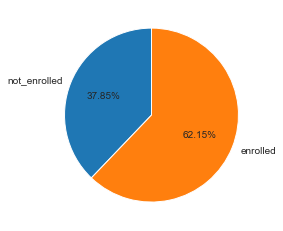

In [30]:
sizes_data = [len(data[data['enrolled']==0]), len(data[data['enrolled']==1])]
labels = ['not_enrolled', 'enrolled']

plt.pie(sizes_data, labels=labels, autopct='%2.2f%%', startangle=90)
plt.show()

## Data Description for Preprocessed Data

In [31]:
list_summary = []

for col in data.columns:
    list_summary.append([col, data[col].dtype, data[col].isna().sum(), 
                        round(data[col].isna().sum()/len(data[col])*100,2), data[col].nunique(),
                        list(data[col].sample(5).drop_duplicates().values)]
                       )
data_desc = pd.DataFrame(list_summary, columns=['feature', 'dtype', 'null', 'nulPct', 'nunique', 'sample'])
data_desc.head(20)

,feature,dtype,null,nulPct,nunique,sample
0,user,int64,0,0.00,49874,"[193634, 88615, 29629, 328990, 328872]"
1,first_open,datetime64[ns],0,0.00,49407,"[2013-04-29T12:48:20.000000000, 2013-04-07T14:..."
2,dayofweek,int64,0,0.00,7,"[1, 4, 6, 5, 0]"
3,hour,int64,0,0.00,24,"[0, 21, 3, 10, 23]"
4,age,int64,0,0.00,78,"[37, 52, 49, 28]"
5,screen_list,object,0,0.00,38799,"[location,VerifyPhone,Credit1,Loan2,Home, join..."
6,numscreens,int64,0,0.00,151,"[13, 71, 22, 11, 15]"
7,minigame,int64,0,0.00,2,"[0, 1]"
8,used_premium_feature,int64,0,0.00,2,"[0, 1]"
9,enrolled,int64,0,0.00,2,"[0, 1]"


In [32]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,fo_to_enrolled,...,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,31074.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,190.791787,...,0.042980,0.041420,0.024360,0.053860,0.524600,0.43092,0.406640,0.020000,0.009480,0.004300
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,621.887128,...,0.202814,0.199262,0.154166,0.225743,0.499399,0.49521,0.491211,0.140001,0.096904,0.065434
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,5434.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Export to cvs file
data.to_csv('clean-data.csv', index=False)